# Deep Learning: Dogs vs Cats Analysis

In [1]:
%matplotlib inline
import math
import numpy as np
import utils; reload(utils)
from utils import *

from sympy import Symbol
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Lambda, Dense
from keras import backend as K
from matplotlib import pyplot as plt

Using Theano backend.


## Workflow for each analysis type (e.g basic, 1 Dense layer...):

1. Create model
2. Train it with the default "Learning Rate" of 0.01 just 1 epoch so we see the speed with what the accuracy is increasing.
3. Increase the "Learning Rate" to 0.1 and train the model between 4 and 12 epochs.
4. Decrease the "Learning Rate" to 0.01 and train the model 4 epochs.
5. Decrease the "Learning Rate" to 0.001 and train the model 2 epochs.
6. Decrease the "Learning Rate" to 0.0001 and train the model 1 epoch.

# Simple Parameters

In [2]:
# We set the "seed" so we make the results a bit more predictable.
np.random.seed(1)

In [3]:
path = 'sample/'
batch_size = 1

In [4]:
vgg = Vgg16()

/Users/javidgon/anaconda/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [93]:
gen = image.ImageDataGenerator()
train_batches = gen.flow_from_directory(path + 'train', target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=batch_size)
val_batches = gen.flow_from_directory(path + 'valid', target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=batch_size)
test_batches = gen.flow_from_directory(path + 'test', target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=batch_size)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 1 classes.


In [94]:
vgg.model.pop()
for layer in vgg.model.layers: layer.trainable=False
vgg.model.add(Dense(train_batches.nb_class, activation='softmax'))
vgg.model.compile(optimizer=Adam(lr=0.01),
                loss='categorical_crossentropy', metrics=['accuracy'])
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [95]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
40/40 [==============================] - 219s - loss: 3.5680 - acc: 0.7250 - val_loss: 2.4228 - val_acc: 0.8000

In [18]:
vgg.model.optimizer.lr=0.1

In [ ]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

In [6]:
vgg.model.optimizer.lr=0.01

In [46]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=2, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/4
 2560/23000 [==>...........................] - ETA: 537s - loss: 0.3515 - acc: 0.9754

KeyboardInterrupt: 

In [51]:
vgg.model.optimizer.lr=0.001

In [ ]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=2, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

In [65]:
vgg.model.optimizer.lr=0.0001

In [66]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
23000/23000 [==============================] - 650s - loss: 0.2233 - acc: 0.9840 - val_loss: 0.2391 - val_acc: 0.9820


In [67]:
vgg.model.save_weights('simple_parameters_1311042017_9840.h5')

In [7]:
vgg.model.load_weights('simple_parameters_1311042017_9840.h5')

# With Data Augmentation

In [28]:
vgg = Vgg16()

/Users/javidgon/anaconda/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_5 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [5]:
gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)

train_batches = gen.flow_from_directory(path + 'train', target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=batch_size)
val_batches = gen.flow_from_directory(path + 'valid', target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=batch_size)
test_batches = gen.flow_from_directory(path + 'test', target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [6]:
vgg.model.pop()
for layer in vgg.model.layers: layer.trainable=False
vgg.model.add(Dense(train_batches.nb_class, activation='softmax'))
vgg.model.compile(optimizer=Adam(lr=0.01),
                loss='categorical_crossentropy', metrics=['accuracy'])
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  0           zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [8]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
23000/23000 [==============================] - 602s - loss: 0.3311 - acc: 0.9759 - val_loss: 0.2864 - val_acc: 0.9790


In [9]:
vgg.model.optimizer.lr=0.1

In [ ]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

In [ ]:
vgg.model.optimizer.lr=0.01

In [ ]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=8, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

In [10]:
vgg.model.optimizer.lr=0.001

In [11]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
23000/23000 [==============================] - 603s - loss: 0.2877 - acc: 0.9792 - val_loss: 0.2929 - val_acc: 0.9800


In [67]:
vgg.model.save_weights('data_augmentation_1311042017_9840.h5')

In [7]:
vgg.model.load_weights('data_augmentation_1311042017_9840.h5')

# Backpropagation

In [12]:
vgg = Vgg16()

In [13]:
gen = image.ImageDataGenerator()
train_batches = gen.flow_from_directory(path + 'train', target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=batch_size)
val_batches = gen.flow_from_directory(path + 'valid', target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=batch_size)
test_batches = gen.flow_from_directory(path + 'test', target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [14]:
# We first train the last layer
vgg.model.pop()
for layer in vgg.model.layers: layer.trainable=False
vgg.model.add(Dense(train_batches.nb_class, activation='softmax'))
vgg.model.compile(optimizer=Adam(lr=0.01),
                loss='categorical_crossentropy', metrics=['accuracy'])
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [15]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
23000/23000 [==============================] - 602s - loss: 0.2624 - acc: 0.9728 - val_loss: 0.1755 - val_acc: 0.9830


In [16]:
# Now we do Backpropagation.
layers = vgg.model.layers
# Get the index of the first dense layer...
first_dense_idx = [index for index,layer in enumerate(layers) if type(layer) is Dense][0]
# ...and set this and all subsequent layers to trainable
for layer in layers[first_dense_idx:]: layer.trainable=True

vgg.model.compile(optimizer=Adam(lr=0.01),
                loss='categorical_crossentropy', metrics=['accuracy'])
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [41]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
 1536/23000 [=>............................] - ETA: 587s - loss: 7.4441 - acc: 0.5378

KeyboardInterrupt: 

In [17]:
vgg.model.optimizer.lr=0.001

In [18]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
20480/23000 [=========================>....] - ETA: 62s - loss: 7.9577 - acc: 0.5062

KeyboardInterrupt: 

In [ ]:
vgg.model.optimizer.lr=0.01

In [ ]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=8, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

In [ ]:
vgg.model.optimizer.lr=0.001

In [ ]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=2, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

In [67]:
vgg.model.save_weights('backpropagation_1311042017_9840.h5')

In [7]:
vgg.model.load_weights('backpropagation_1311042017_9840.h5')

# With Data Augmentation + Backpropagation

In [ ]:
vgg = Vgg16()

In [ ]:
gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
train_batches = gen.flow_from_directory(path + 'train', target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=batch_size)
val_batches = gen.flow_from_directory(path + 'valid', target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=batch_size)
test_batches = gen.flow_from_directory(path + 'test', target_size=(224,224),
                class_mode='categorical', shuffle=True, batch_size=batch_size)

In [14]:
# We first train the last layer
vgg.model.pop()
for layer in vgg.model.layers: layer.trainable=False
vgg.model.add(Dense(train_batches.nb_class, activation='softmax'))
vgg.model.compile(optimizer=Adam(lr=0.01),
                loss='categorical_crossentropy', metrics=['accuracy'])
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  0           zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [41]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
 1536/23000 [=>............................] - ETA: 587s - loss: 7.4441 - acc: 0.5378

KeyboardInterrupt: 

In [39]:
layers = vgg.model.layers
# Get the index of the first dense layer...
first_dense_idx = [index for index,layer in enumerate(layers) if type(layer) is Dense][0]
# ...and set this and all subsequent layers to trainable
for layer in layers[first_dense_idx:]: layer.trainable=True

vgg.model.compile(optimizer=Adam(lr=0.01),
                loss='categorical_crossentropy', metrics=['accuracy'])
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  0           zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [41]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=1, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/1
 1536/23000 [=>............................] - ETA: 587s - loss: 7.4441 - acc: 0.5378

KeyboardInterrupt: 

In [ ]:
vgg.model.optimizer.lr=0.1

In [ ]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=4, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/4
40/40 [==============================] - 165s - loss: 0.4655 - acc: 0.9500 - val_loss: 1.6118 - val_acc: 0.9000

In [ ]:
vgg.model.optimizer.lr=0.01

In [ ]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=8, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

In [ ]:
vgg.model.optimizer.lr=0.001

In [ ]:
vgg.model.fit_generator(train_batches, samples_per_epoch=train_batches.nb_sample,
                nb_epoch=2, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

In [67]:
vgg.model.save_weights('data_augmentation_backpropagation_1311042017_9840.h5')

In [7]:
vgg.model.load_weights('data_augmentation_backpropagation_1311042017_9840.h5')

# Viewing model prediction examples

* A few correct labels at random
* A few incorrect labels at random
* The most correct labels of each class (ie those with highest probability that are correct)
* The most incorrect labels of each class (ie those with highest probability that are incorrect)
* The most uncertain labels (ie those with probability closest to 0.5).

In [96]:
val_batches, probs = vgg.test(path + 'valid', batch_size = batch_size)

filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

Found 20 images belonging to 2 classes.


In [97]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

Found 16 correct labels


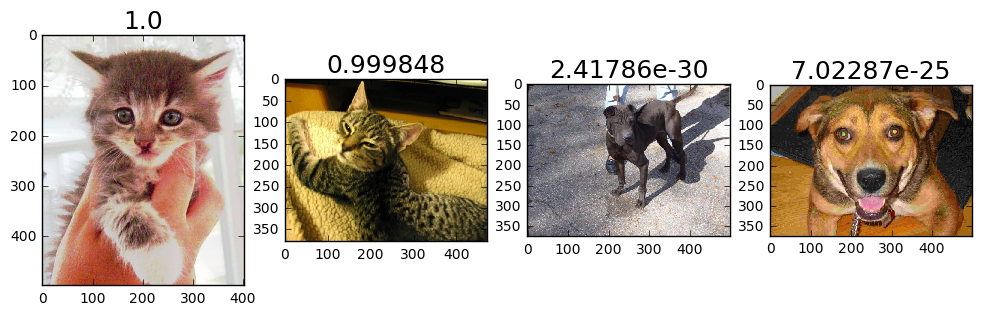

In [98]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print "Found %d correct labels" % len(correct)
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 4 incorrect labels


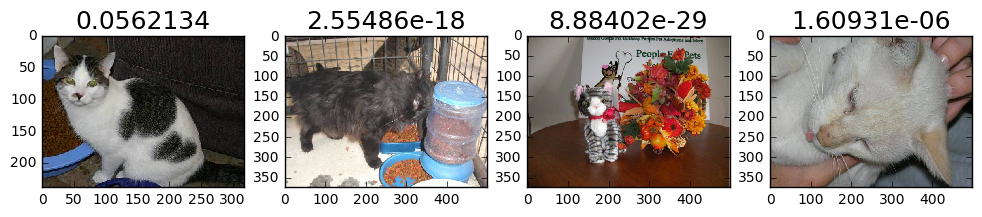

In [99]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print "Found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 6 confident correct cats labels


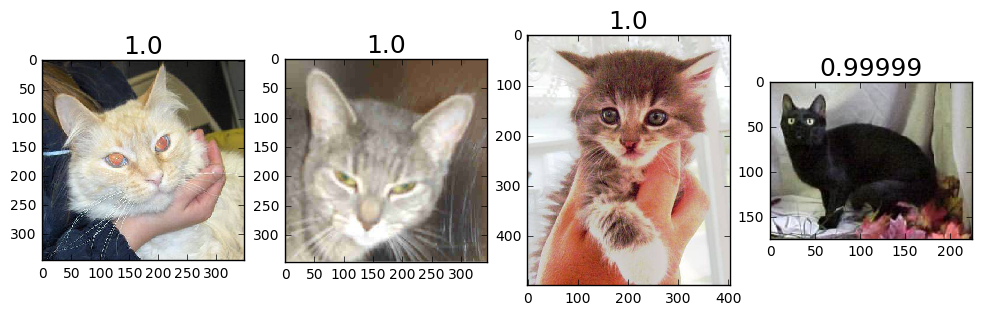

In [100]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print "Found %d confident correct cats labels" % len(correct_cats)
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

Found 10 confident correct dogs labels


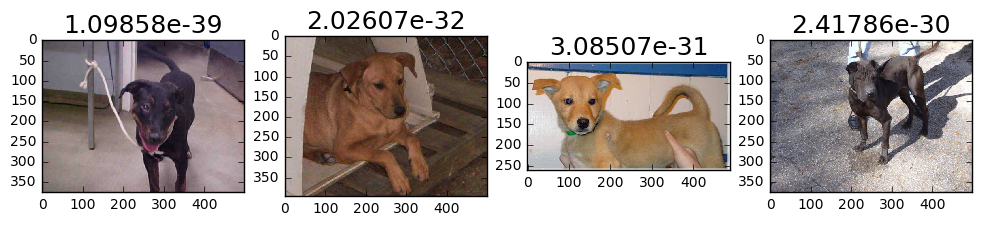

In [101]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print "Found %d confident correct dogs labels" % len(correct_dogs)
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

In [102]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print "Found %d incorrect cats" % len(incorrect_cats)
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

Found 0 incorrect cats


Found 4 incorrect dogs


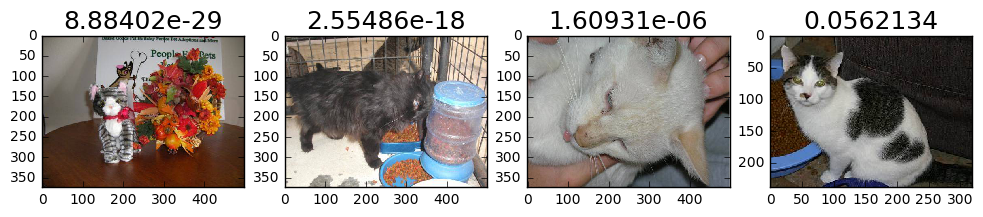

In [103]:
#4b. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print "Found %d incorrect dogs" % len(incorrect_dogs)
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_predictions[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs])

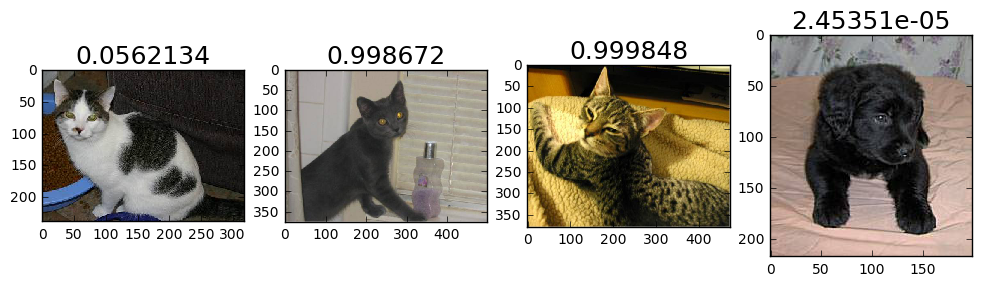

In [104]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

# Confussion Matrix

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

[[ 6  4]
 [ 0 10]]


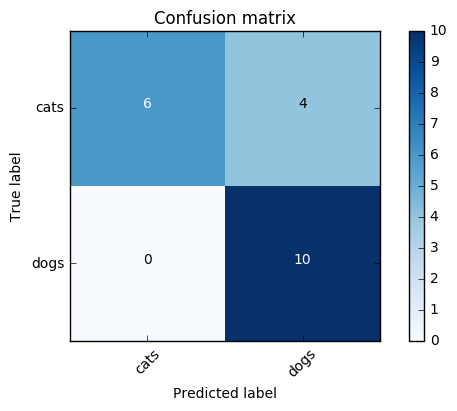

In [106]:
plot_confusion_matrix(cm, val_batches.class_indices)

# Predict Test set + create Kaggle submission file

In [68]:
predictions = vgg.model.predict_generator(test_batches, test_batches.nb_sample)

In [69]:
isdog = predictions[:,1]
print "Raw Predictions: " + str(isdog[:5])
print "Mid Predictions: " + str(isdog[(isdog < .6) & (isdog > .4)])
print "Edge Predictions: " + str(isdog[(isdog == 1) | (isdog == 0)])

Raw Predictions: [ 0.  1.  0.  0.  1.]
Mid Predictions: [ 0.4523  0.4023  0.5278  0.5821  0.427   0.4303]
Edge Predictions: [ 0.  1.  0. ...,  0.  0.  1.]


In [70]:
isdog = isdog.clip(min=0.05, max=0.95)

In [71]:
#Extract imageIds from the filenames in our test/unknown directory 
filenames = test_batches.filenames

ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [72]:
subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[  9.2920e+03,   5.0000e-02],
       [  1.2026e+04,   9.5000e-01],
       [  9.6880e+03,   5.0000e-02],
       [  4.3920e+03,   5.0000e-02],
       [  7.7900e+02,   9.5000e-01]])

In [73]:
submission_file_name = 'submission131104012017_5.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

In [74]:
from IPython.display import FileLink
FileLink(submission_file_name)

/home/ubuntu/kaggle/dogs-vs-cats-redux-kernels-edition/submission131104012017_5.csv